In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
from qiskit.providers.fake_provider import *
import numpy as np 
import os

########## INPUT ############
f=5 # number of fake_backend want to choose
lower_limit= 3 # the lower limit of qubits for the circuit
upper_limit= 17 # the lower limit of qubits for the circuit
steps= 2 #jump in qubit numbers
name_of_algo='ghz'

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, f)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.oslo.fake_oslo.FakeOslo,
 qiskit.providers.fake_provider.backends.auckland.fake_auckland.FakeAuckland,
 qiskit.providers.fake_provider.backends.guadalupe.fake_guadalupe.FakeGuadalupeV2,
 qiskit.providers.fake_provider.backends.brooklyn.fake_brooklyn.FakeBrooklynV2,
 qiskit.providers.fake_provider.backends.lagos.fake_lagos.FakeLagosV2]

In [3]:
benchmarks=[]
for i in range(lower_limit,upper_limit,steps):
    label = name_of_algo+str(i)
    benchmarks.append((supermarq.ghz.GHZ(i),label))
for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("--------------------------",i[1],"---------------------------")
    #circuit.draw(output="mpl")
    print(circuit.draw())

-------------------------- ghz3 ---------------------------
     ┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2 
-------------------------- ghz5 ---------------------------
     ┌───┐          ┌─┐                      
q_0: ┤ H ├──■───────┤M├──────────────────────
     └───┘┌─┴─┐     └╥┘     ┌─┐              
q_1: ─────┤ X ├──■───╫──────┤M├──────────────
          └───┘┌─┴─┐ ║      └╥┘     ┌─┐      
q_2: ──────────┤ X ├─╫───■───╫──────┤M├──────
               └───┘ ║ ┌─┴─┐ ║      └╥┘┌─┐   
q_3: ────────────────╫─┤ X ├─╫───■───╫─┤M├───
                     ║ └───┘ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_4: ────────────────╫───────╫─┤ X ├─╫──╫─┤M├
                     ║       ║ └───┘ ║  ║ └╥┘
c: 5/════════════════╩═══════╩═══════╩══╩══╩═
                     0       1       2  3  4 
------------

In [4]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'ghz3': [0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], 'ghz5': [0.4, 1.0, 0.8, 0.4666666666666667, 0.0, 0], 'ghz7': [0.2857142857142857, 1.0, 0.8571428571428571, 0.35714285714285715, 0.0, 0], 'ghz9': [0.2222222222222222, 1.0, 0.8888888888888888, 0.28888888888888886, 0.0, 0], 'ghz11': [0.18181818181818182, 1.0, 0.9090909090909091, 0.24242424242424243, 0.0, 0], 'ghz13': [0.15384615384615385, 1.0, 0.9230769230769231, 0.2087912087912088, 0.0, 0], 'ghz15': [0.13333333333333333, 1.0, 0.9333333333333333, 0.18333333333333332, 0.0, 0]}


In [5]:
jobs =[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("------------------------BACKEND-NAME :: ", backend().name)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        score_list=[]
        for i in range(0,5):
            job = backend().run(circuit, shots=1000)
            result=job.result()
            counts = job.result(0).get_counts()
            score = benchmark.score(counts)
            score_list.append(score)
        score = np.mean(score_list) 
        sd = np.std(score_list)
        print(label," :: ",score,"                       SD :: ",sd)
        #counts=job.result(0).count()
        jobs.append((label,benchmark,backend,job,score,sd))
#jobs

=============SCORES OF ALL THE CIRCUITS=============
------------------------BACKEND-NAME ::  fake_oslo
ghz3  ::  0.9614004731931415                        SD ::  0.005292520590656158
ghz5  ::  0.9270610145253808                        SD ::  0.006390372883166091
ghz7  ::  0.8782089301940624                        SD ::  0.004095727714714186
ghz9  ::  0.8798099804280277                        SD ::  0.00535886602556493
ghz11  ::  0.8763220668141841                        SD ::  0.013303820987675
ghz13  ::  0.8754824544218595                        SD ::  0.008868301326298069
ghz15  ::  0.8748764421412402                        SD ::  0.005127172307770305
------------------------BACKEND-NAME ::  fake_auckland
ghz3  ::  0.9476023488974992                        SD ::  0.007254120118287784
ghz5  ::  0.917134072463942                        SD ::  0.004607784371095139
ghz7  ::  0.9008367975258803                        SD ::  0.004912455431803546
ghz9  ::  0.8666663658503555               

In [6]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score,sd in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(fakes().name)
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   
#print(all_scores)    

USED BACKEND:: fake_oslo ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9614004731931415


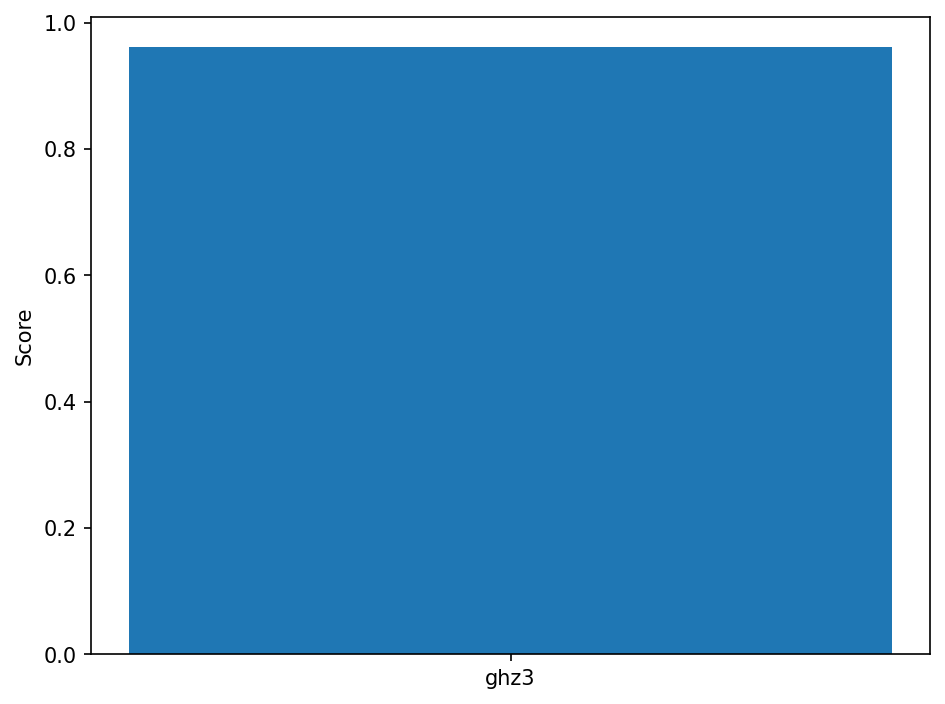

-----------------------------------------------------------
USED BACKEND:: fake_oslo ; CIRCUIT_NAME: ghz5 ; SCORE = 0.9270610145253808


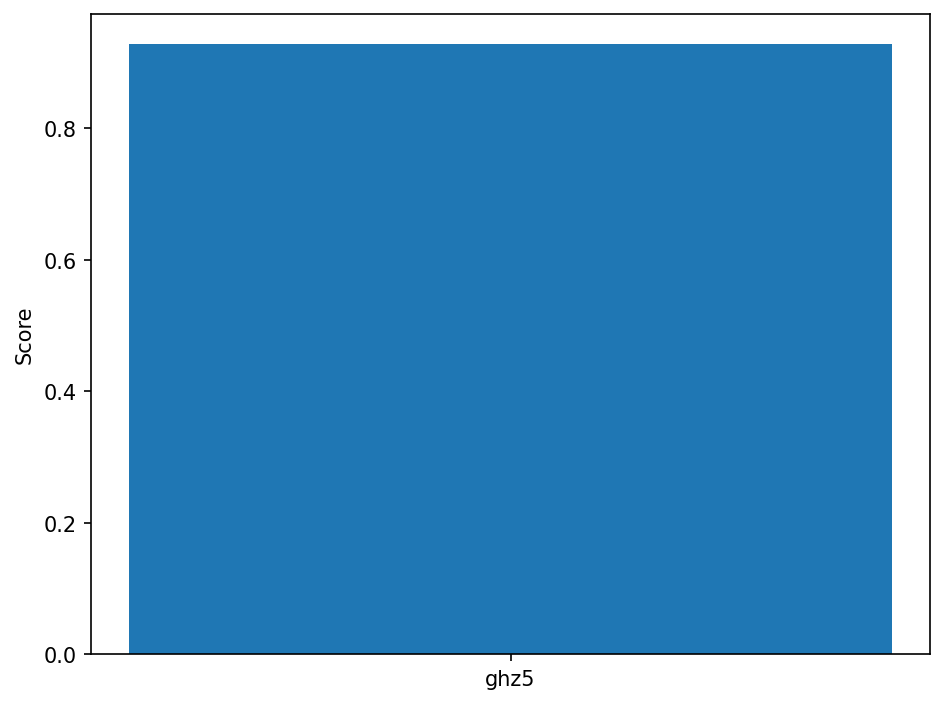

-----------------------------------------------------------
USED BACKEND:: fake_oslo ; CIRCUIT_NAME: ghz7 ; SCORE = 0.8782089301940624


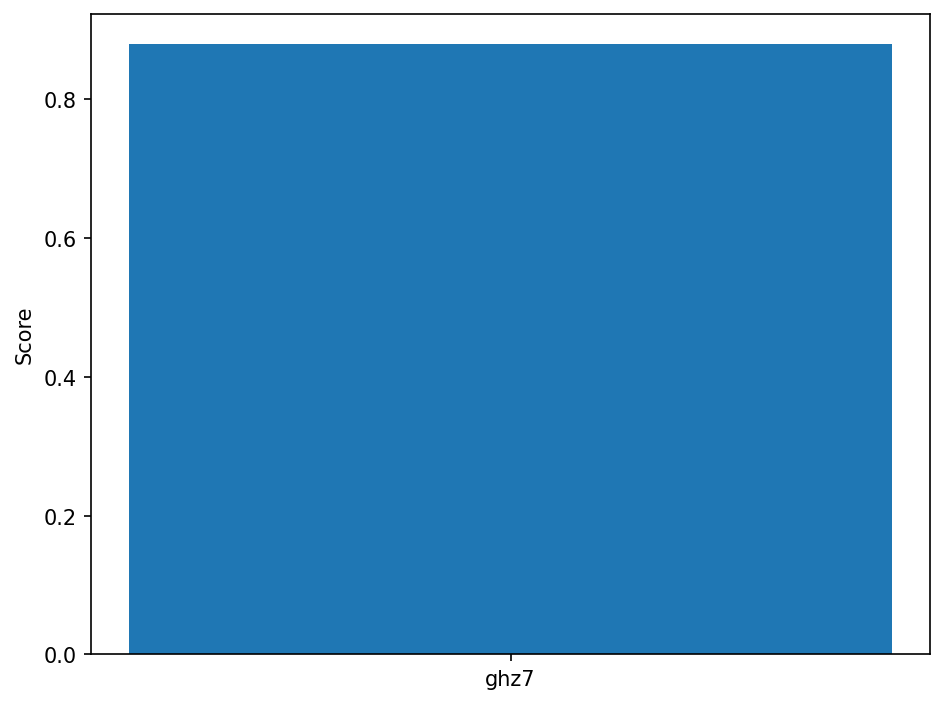

-----------------------------------------------------------
USED BACKEND:: fake_oslo ; CIRCUIT_NAME: ghz9 ; SCORE = 0.8798099804280277


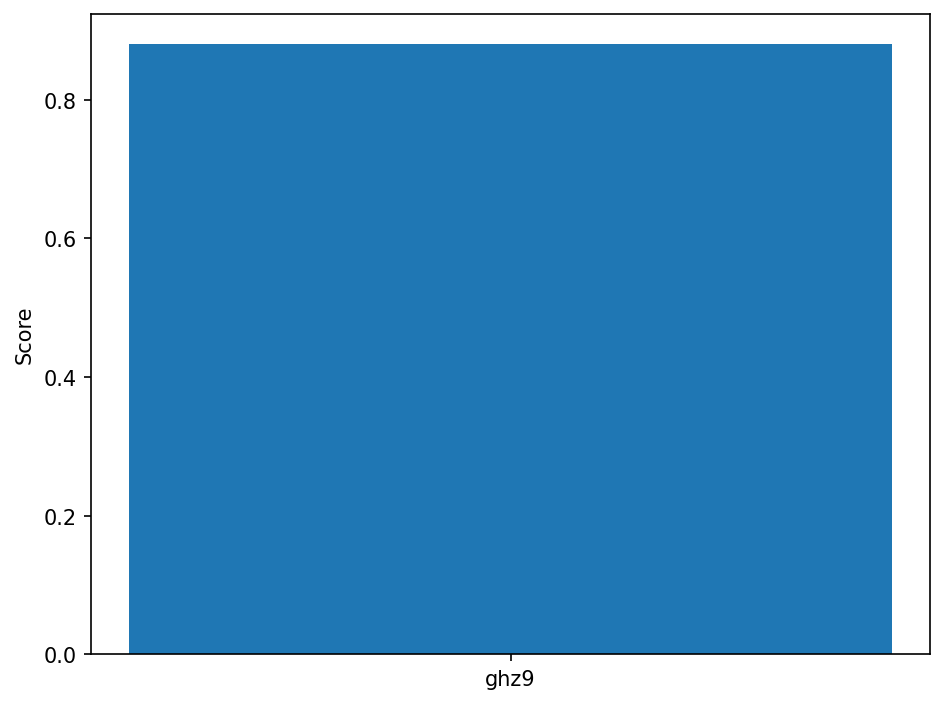

-----------------------------------------------------------
USED BACKEND:: fake_oslo ; CIRCUIT_NAME: ghz11 ; SCORE = 0.8763220668141841


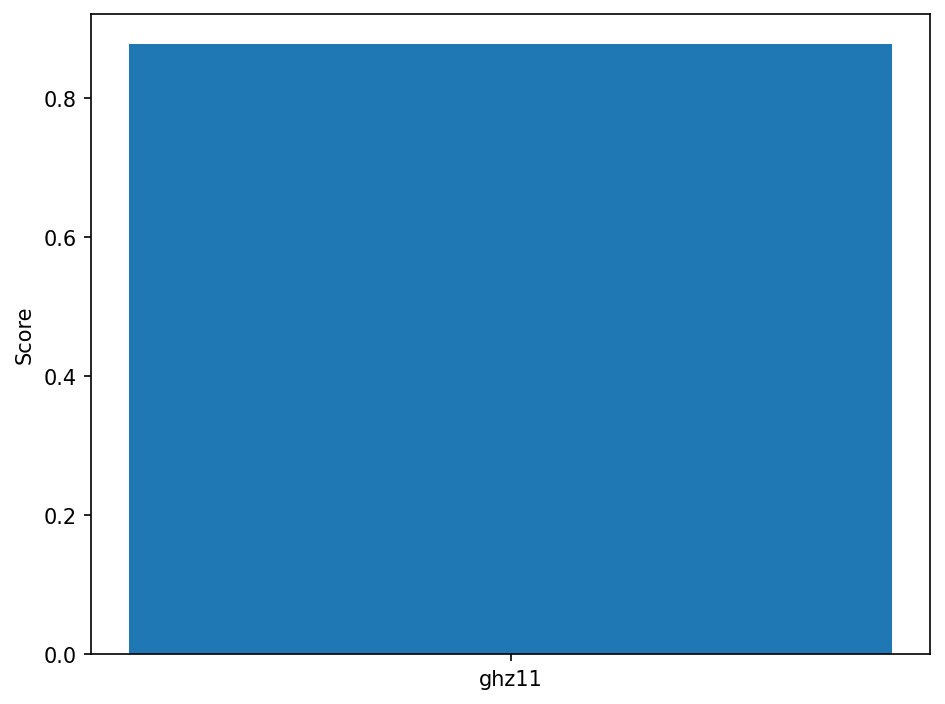

-----------------------------------------------------------
USED BACKEND:: fake_oslo ; CIRCUIT_NAME: ghz13 ; SCORE = 0.8754824544218595


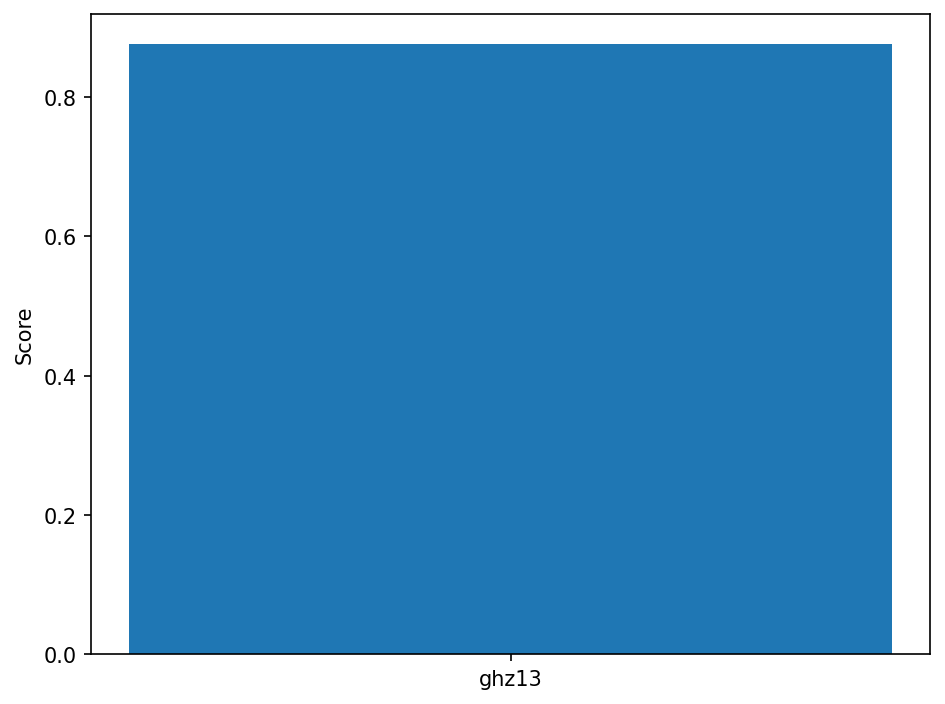

-----------------------------------------------------------
USED BACKEND:: fake_oslo ; CIRCUIT_NAME: ghz15 ; SCORE = 0.8748764421412402


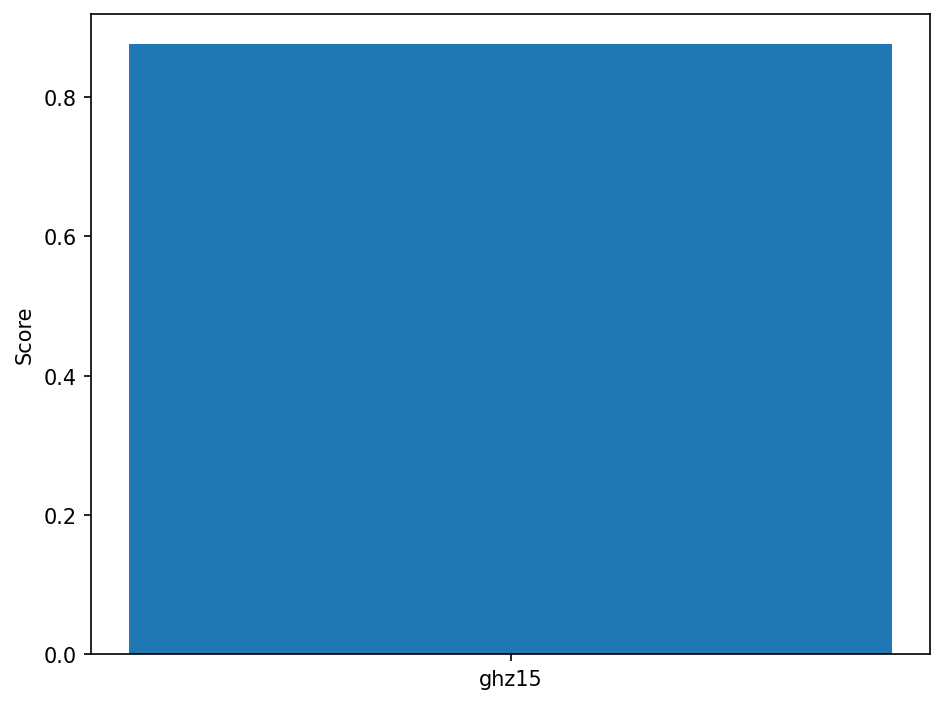

-----------------------------------------------------------
USED BACKEND:: fake_auckland ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9476023488974992


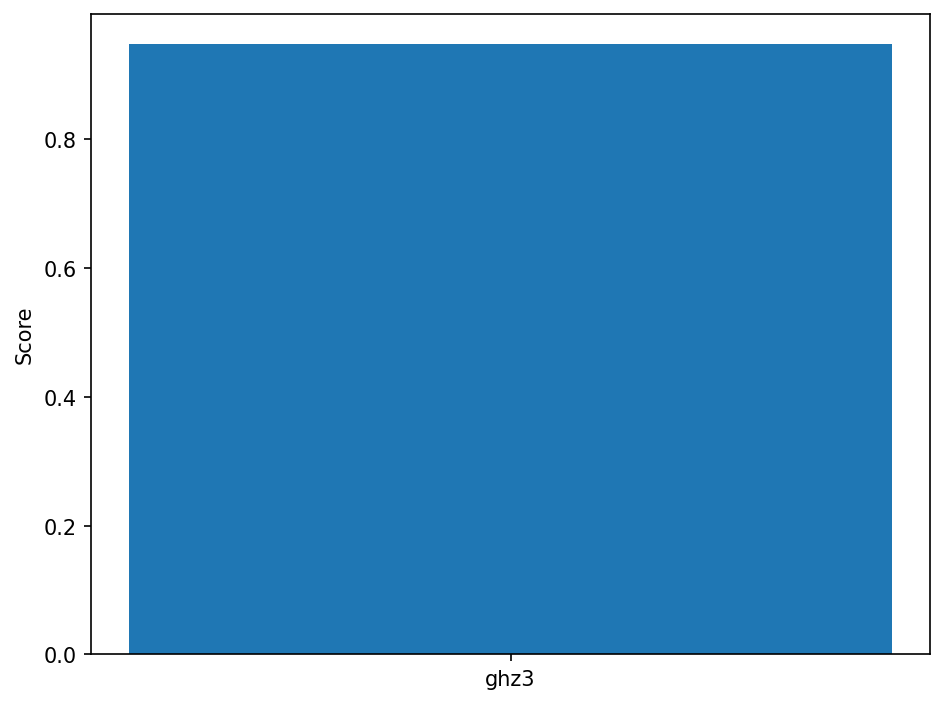

-----------------------------------------------------------
USED BACKEND:: fake_auckland ; CIRCUIT_NAME: ghz5 ; SCORE = 0.917134072463942


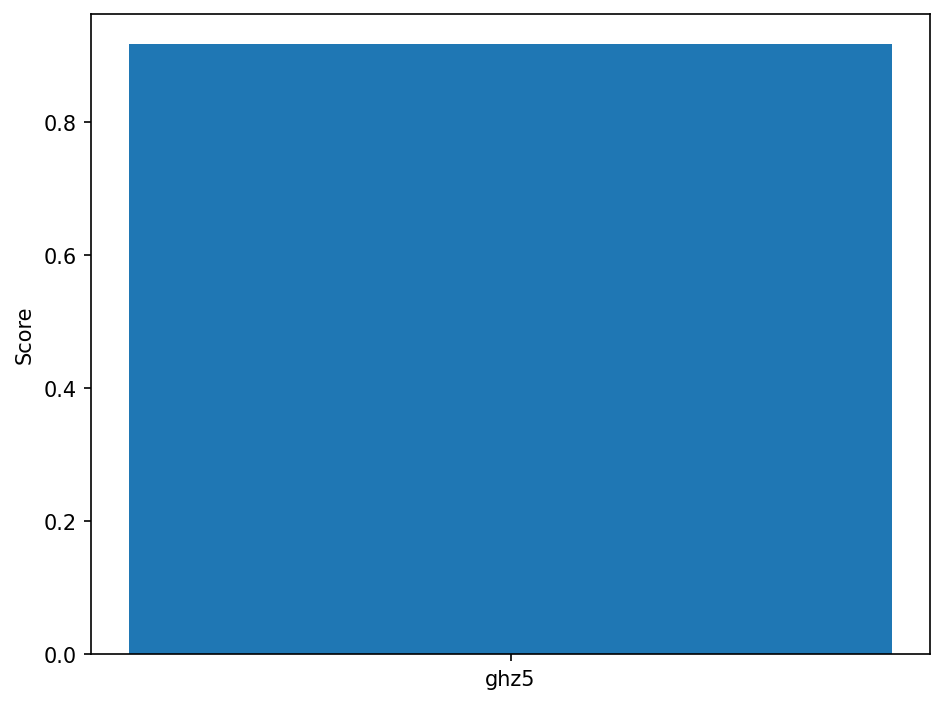

-----------------------------------------------------------
USED BACKEND:: fake_auckland ; CIRCUIT_NAME: ghz7 ; SCORE = 0.9008367975258803


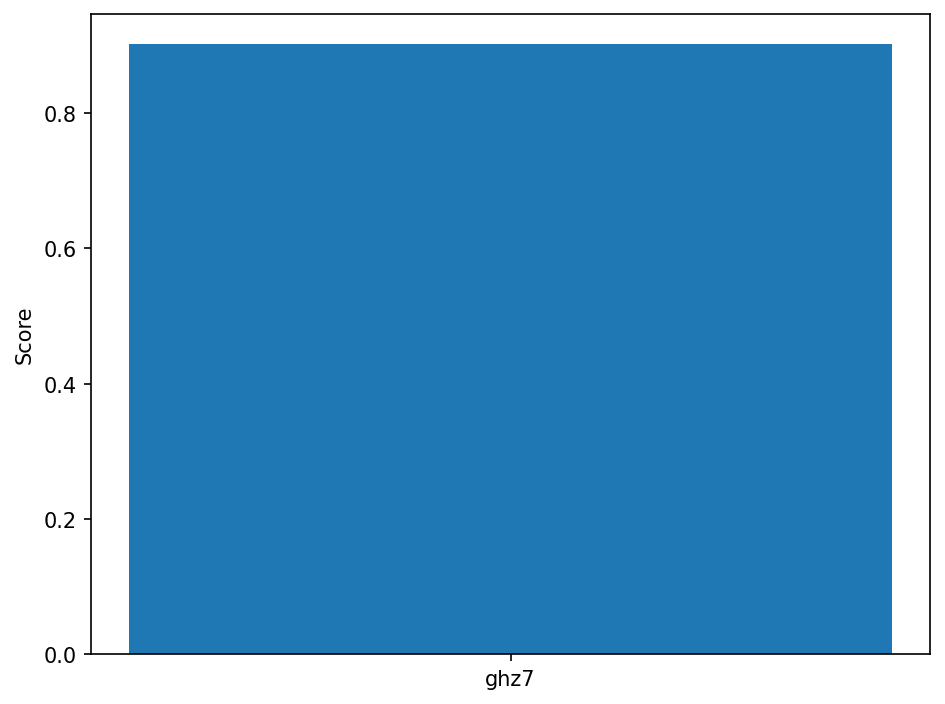

-----------------------------------------------------------
USED BACKEND:: fake_auckland ; CIRCUIT_NAME: ghz9 ; SCORE = 0.8666663658503555


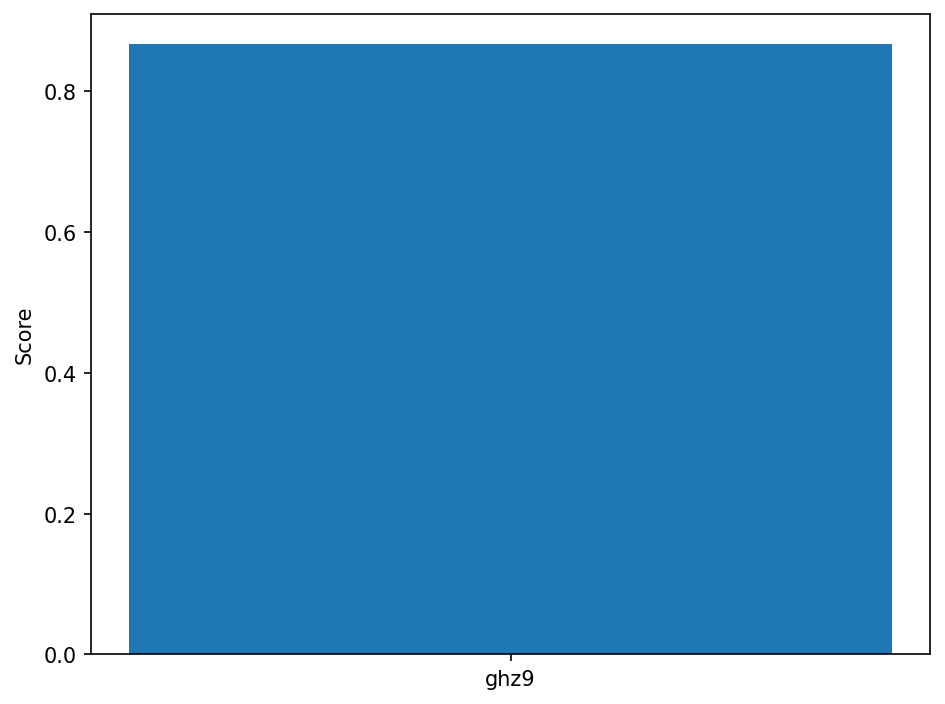

-----------------------------------------------------------
USED BACKEND:: fake_auckland ; CIRCUIT_NAME: ghz11 ; SCORE = 0.8404274524514175


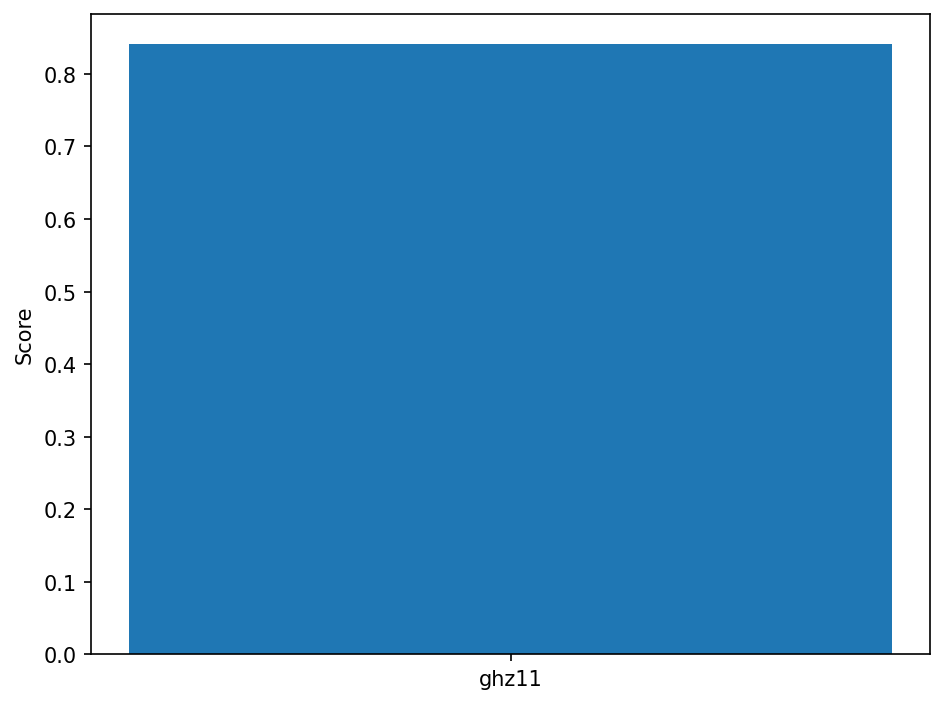

-----------------------------------------------------------
USED BACKEND:: fake_auckland ; CIRCUIT_NAME: ghz13 ; SCORE = 0.8170285542440912


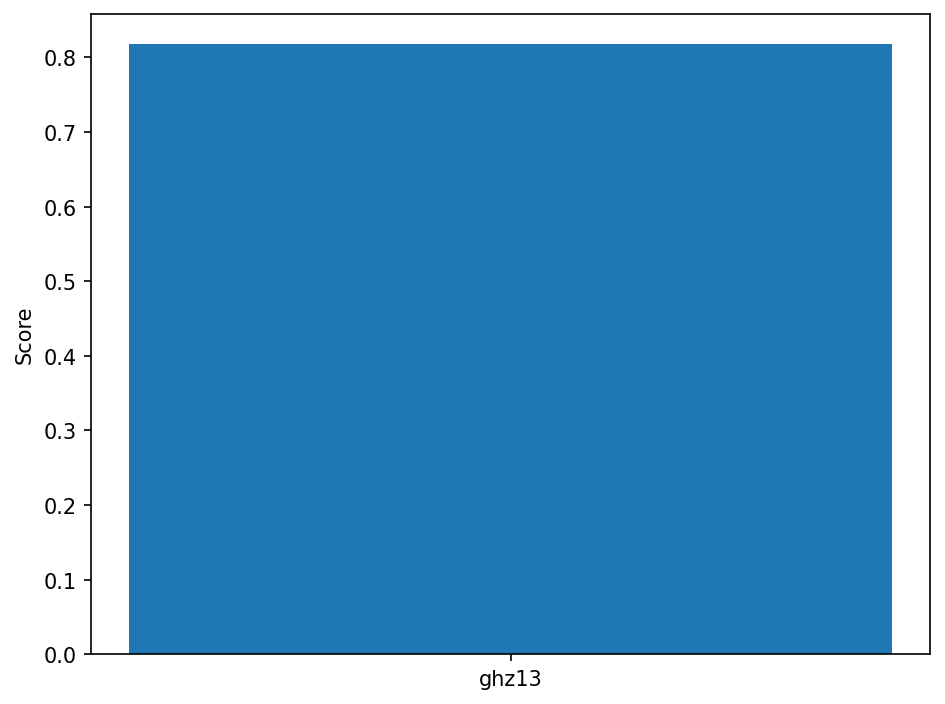

-----------------------------------------------------------
USED BACKEND:: fake_auckland ; CIRCUIT_NAME: ghz15 ; SCORE = 0.8098913739156188


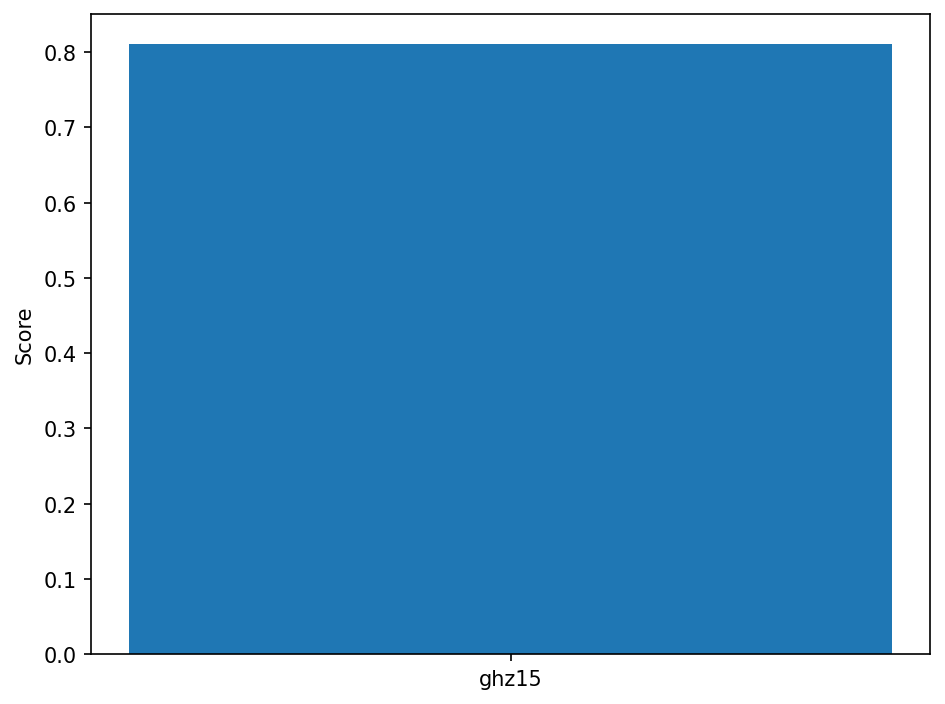

-----------------------------------------------------------
USED BACKEND:: fake_guadalupe ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9264197115720769


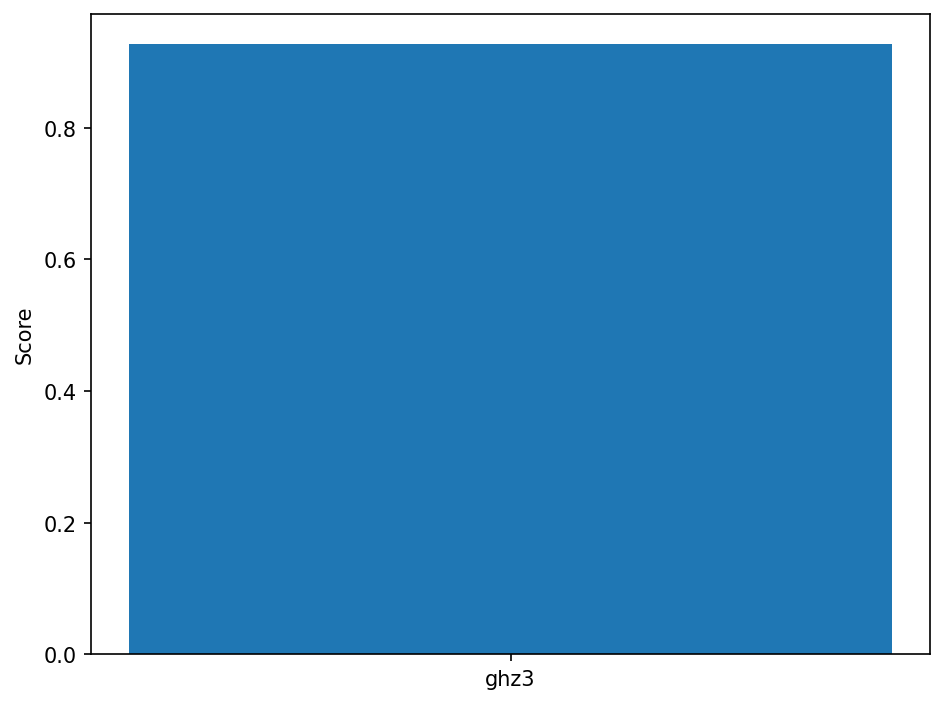

-----------------------------------------------------------
USED BACKEND:: fake_guadalupe ; CIRCUIT_NAME: ghz5 ; SCORE = 0.8703526709811744


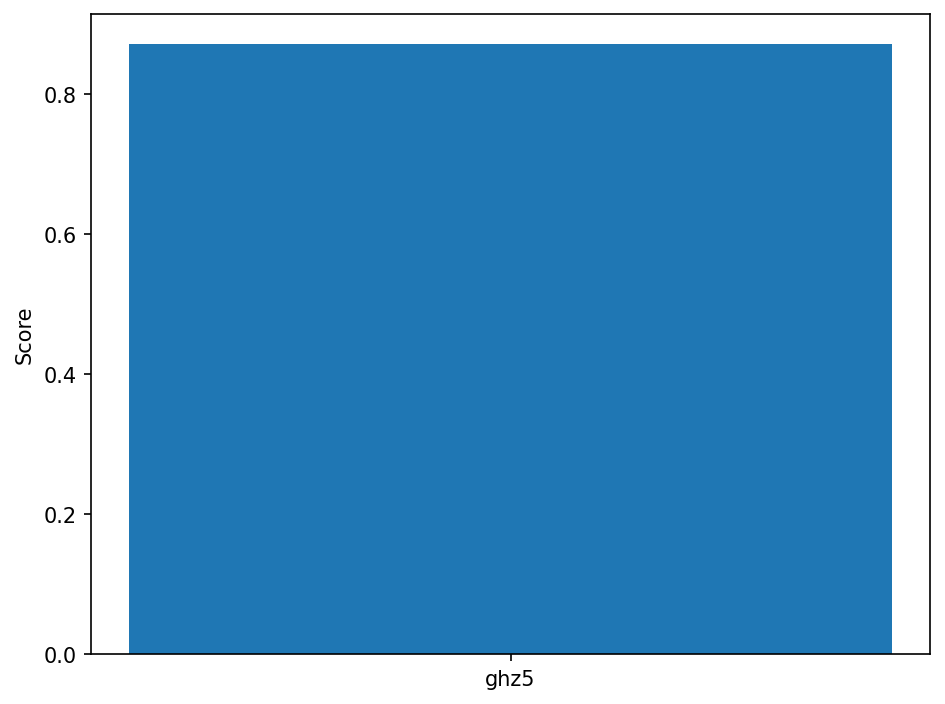

-----------------------------------------------------------
USED BACKEND:: fake_guadalupe ; CIRCUIT_NAME: ghz7 ; SCORE = 0.844450061891569


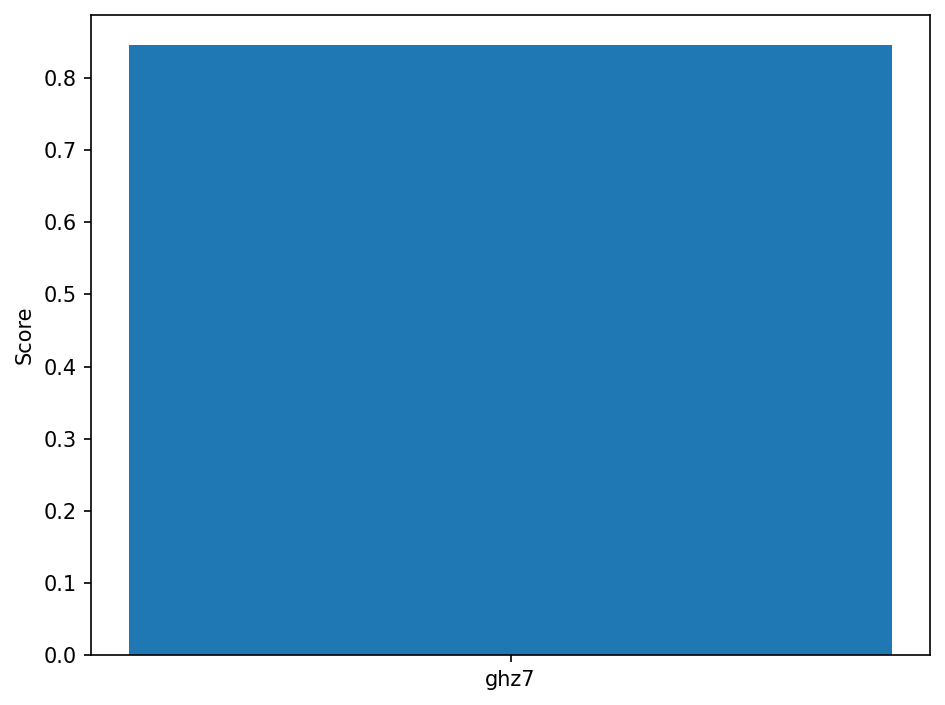

-----------------------------------------------------------
USED BACKEND:: fake_guadalupe ; CIRCUIT_NAME: ghz9 ; SCORE = 0.7793750598738169


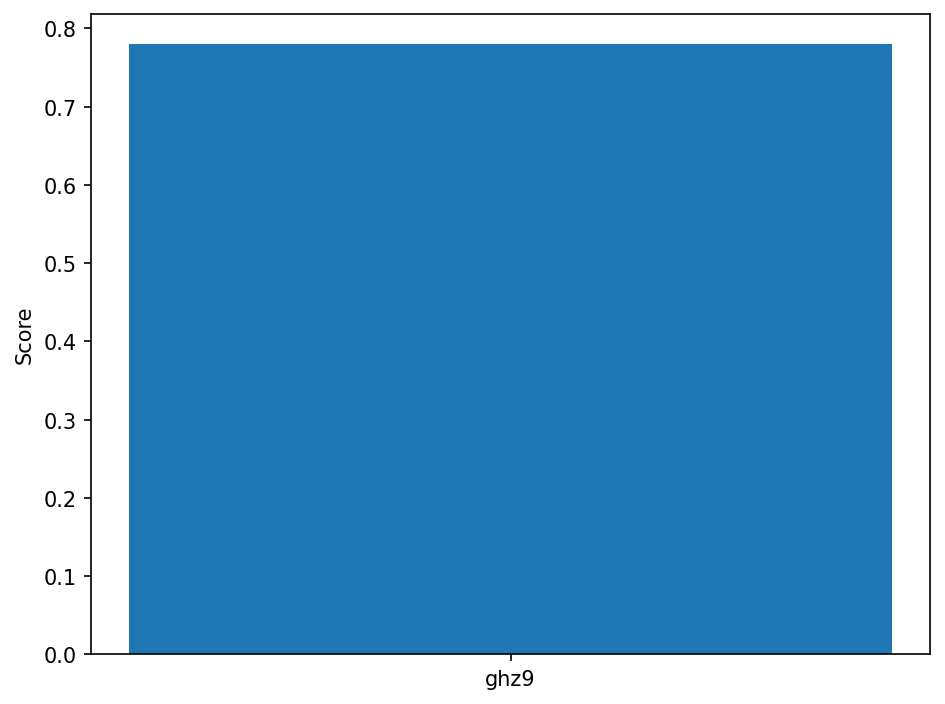

-----------------------------------------------------------
USED BACKEND:: fake_guadalupe ; CIRCUIT_NAME: ghz11 ; SCORE = 0.7477679434708008


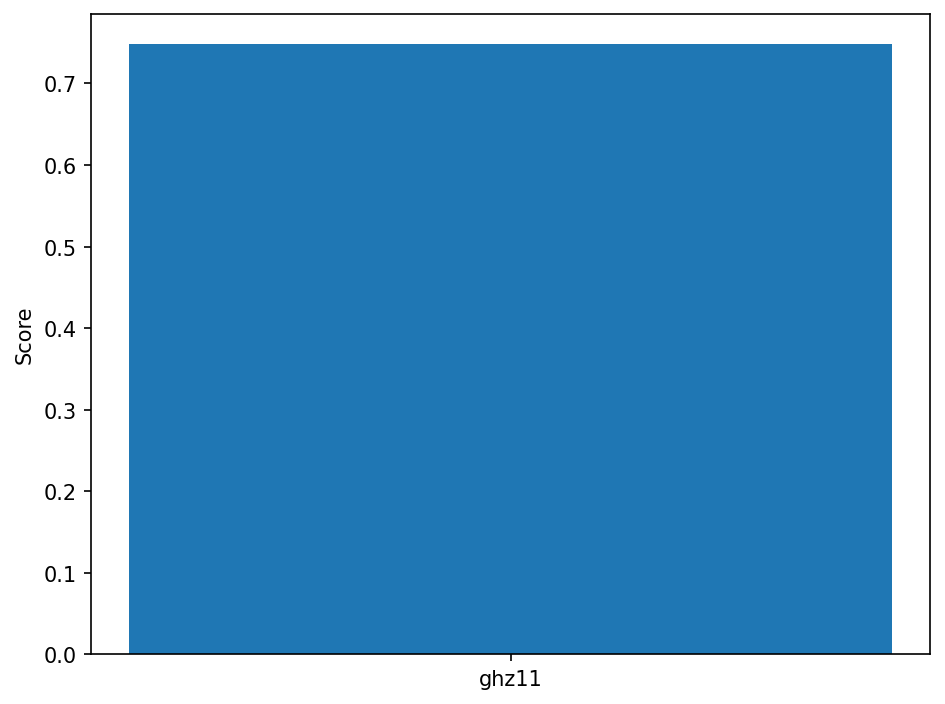

-----------------------------------------------------------
USED BACKEND:: fake_guadalupe ; CIRCUIT_NAME: ghz13 ; SCORE = 0.730613331963925


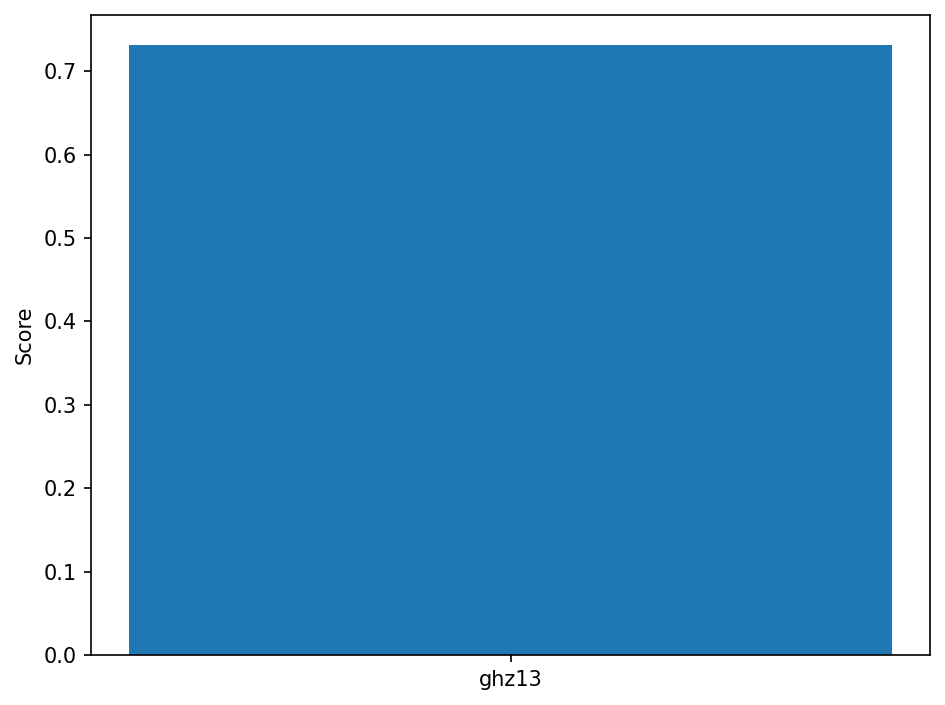

-----------------------------------------------------------
USED BACKEND:: fake_guadalupe ; CIRCUIT_NAME: ghz15 ; SCORE = 0.6861761417151986


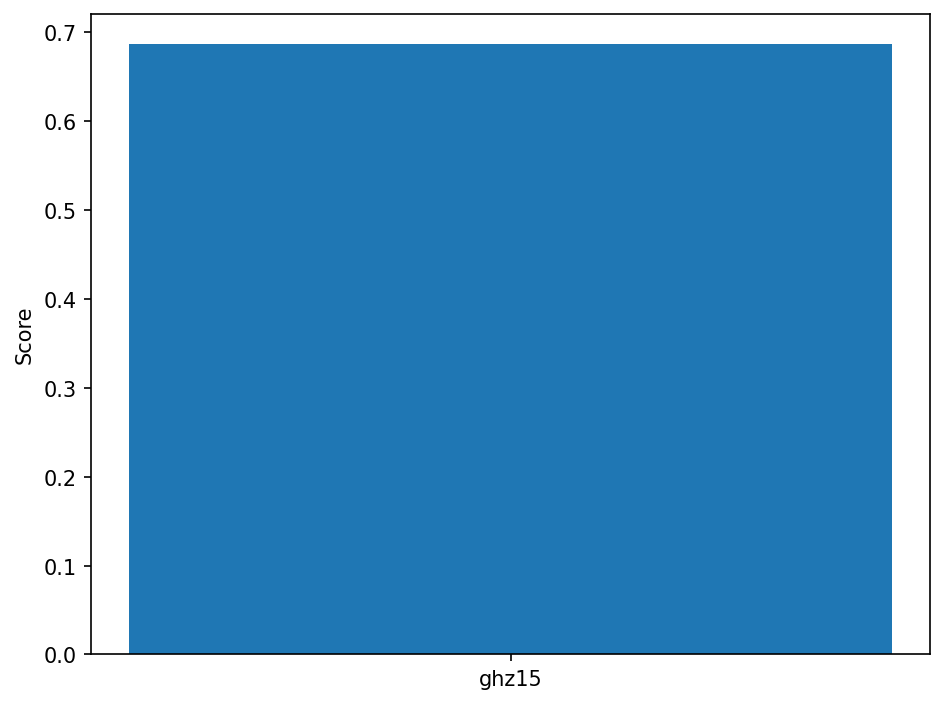

-----------------------------------------------------------
USED BACKEND:: fake_brooklyn ; CIRCUIT_NAME: ghz3 ; SCORE = 0.8881548581507435


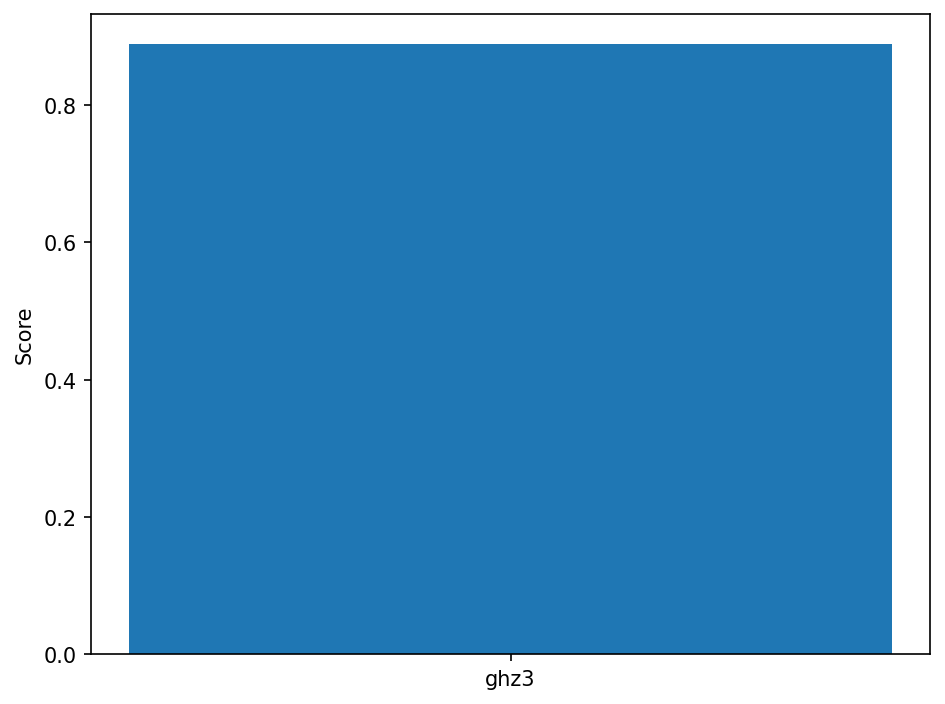

-----------------------------------------------------------
USED BACKEND:: fake_brooklyn ; CIRCUIT_NAME: ghz5 ; SCORE = 0.8010721413677435


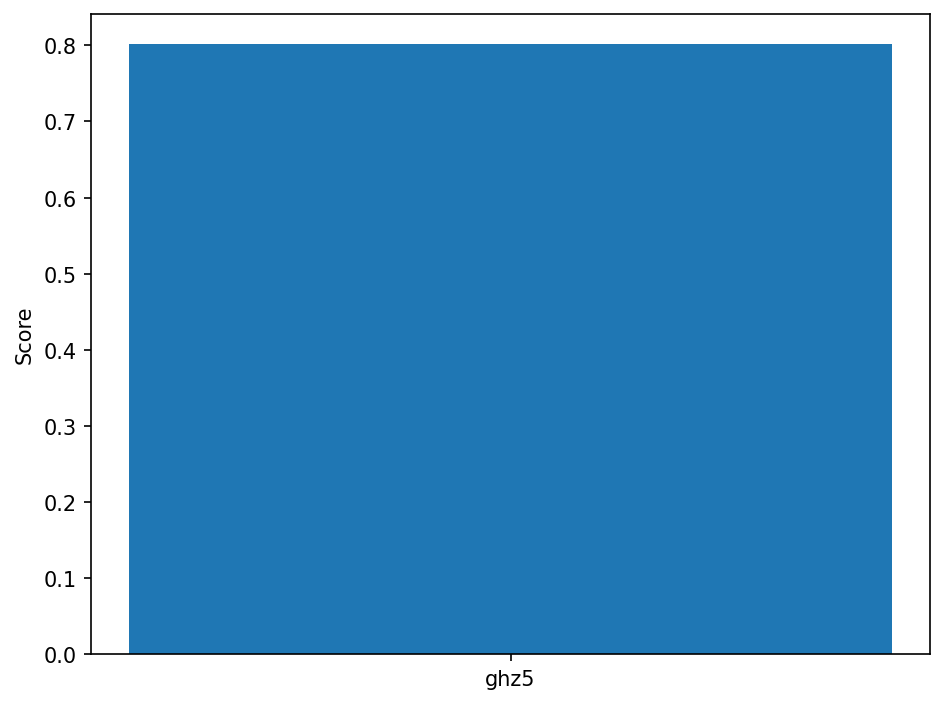

-----------------------------------------------------------
USED BACKEND:: fake_brooklyn ; CIRCUIT_NAME: ghz7 ; SCORE = 0.7568789361653585


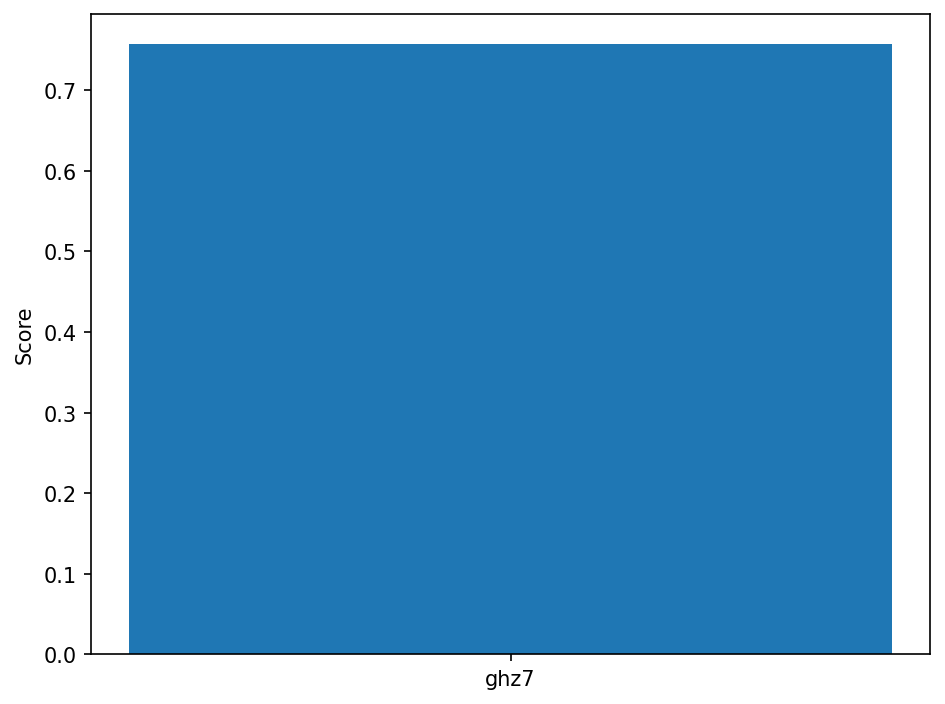

-----------------------------------------------------------
USED BACKEND:: fake_brooklyn ; CIRCUIT_NAME: ghz9 ; SCORE = 0.7171508468778006


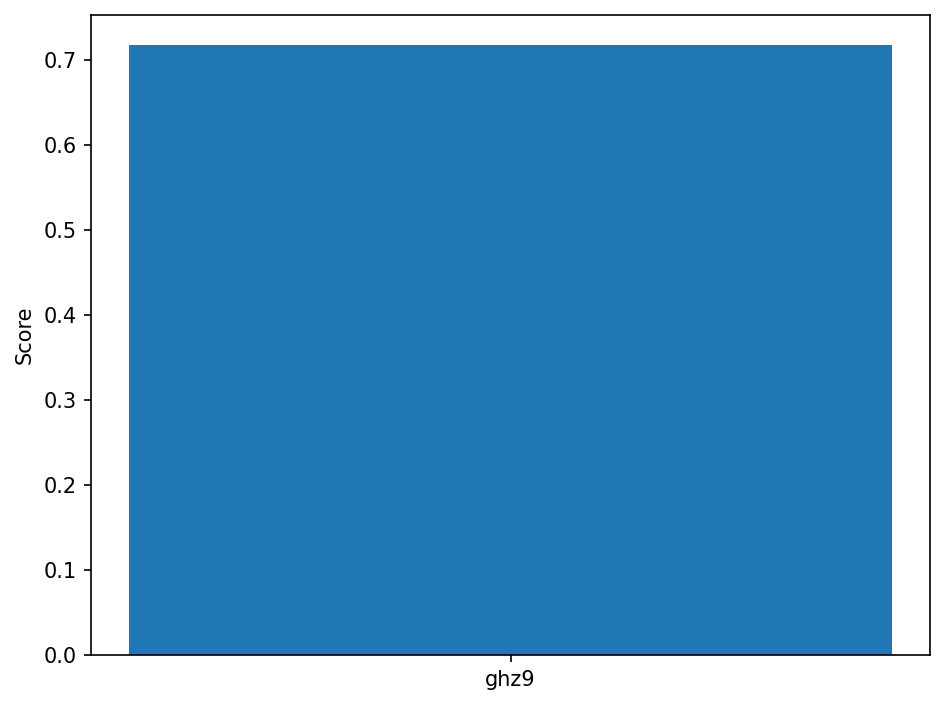

-----------------------------------------------------------
USED BACKEND:: fake_brooklyn ; CIRCUIT_NAME: ghz11 ; SCORE = 0.6859970054923578


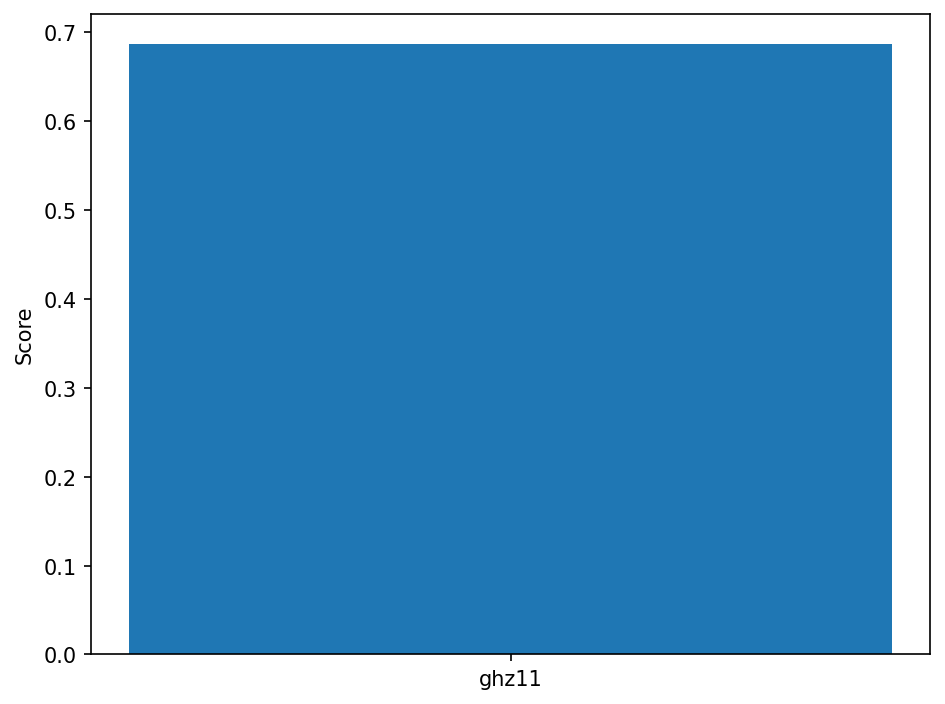

-----------------------------------------------------------
USED BACKEND:: fake_brooklyn ; CIRCUIT_NAME: ghz13 ; SCORE = 0.6458381733339744


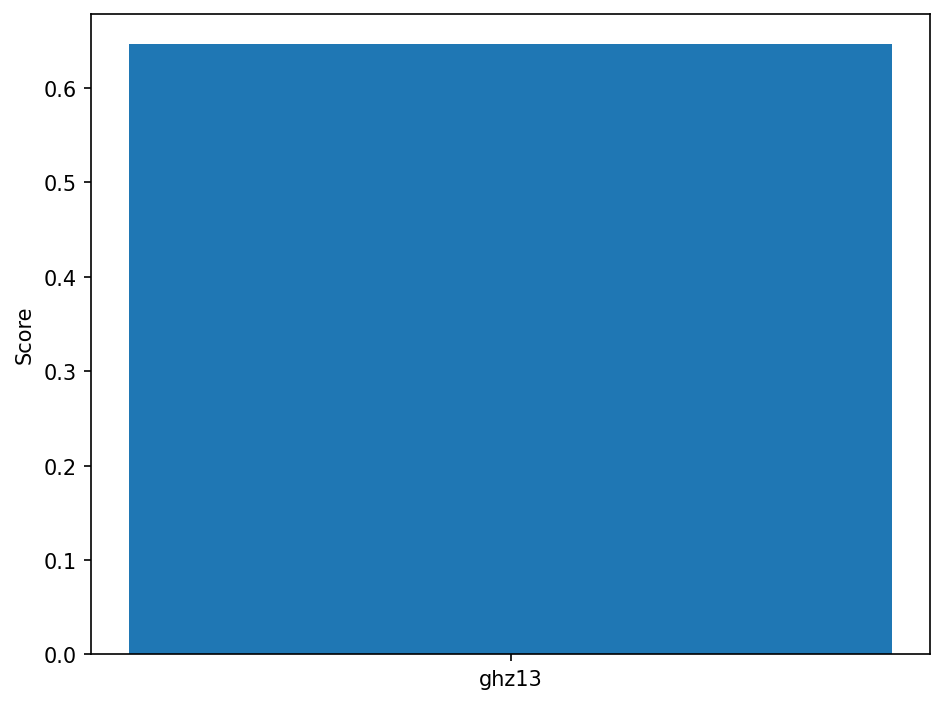

-----------------------------------------------------------
USED BACKEND:: fake_brooklyn ; CIRCUIT_NAME: ghz15 ; SCORE = 0.6138217687195658


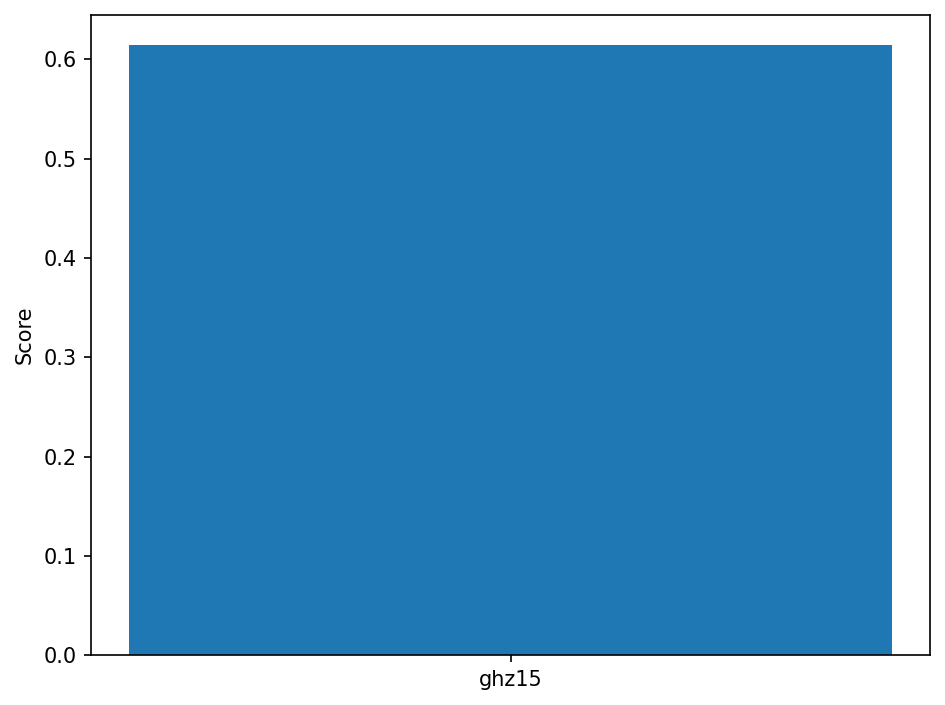

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9587306973028973


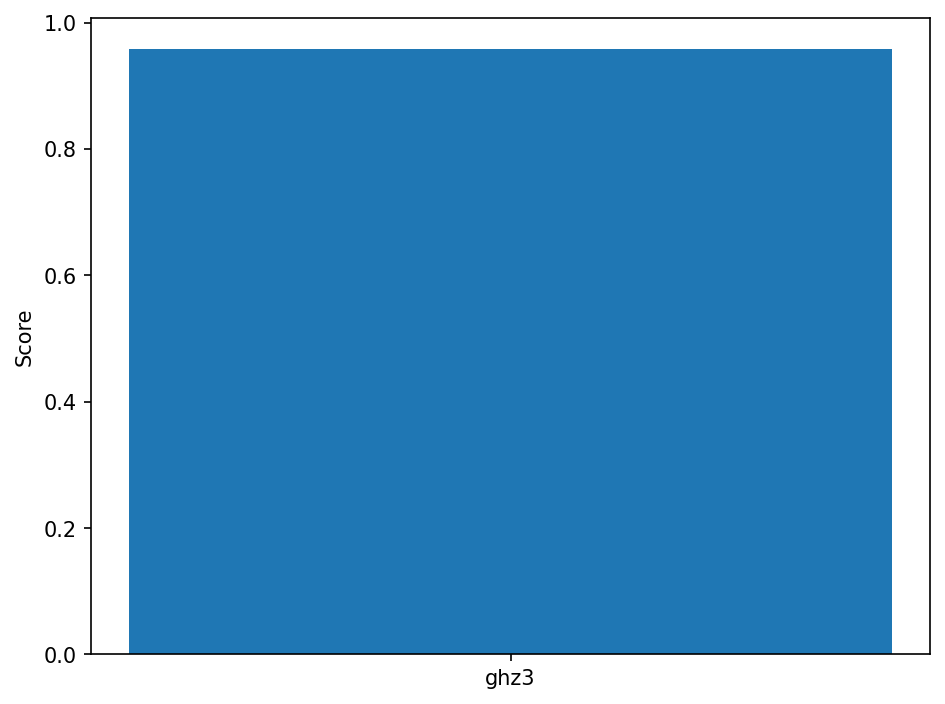

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz5 ; SCORE = 0.950157364316986


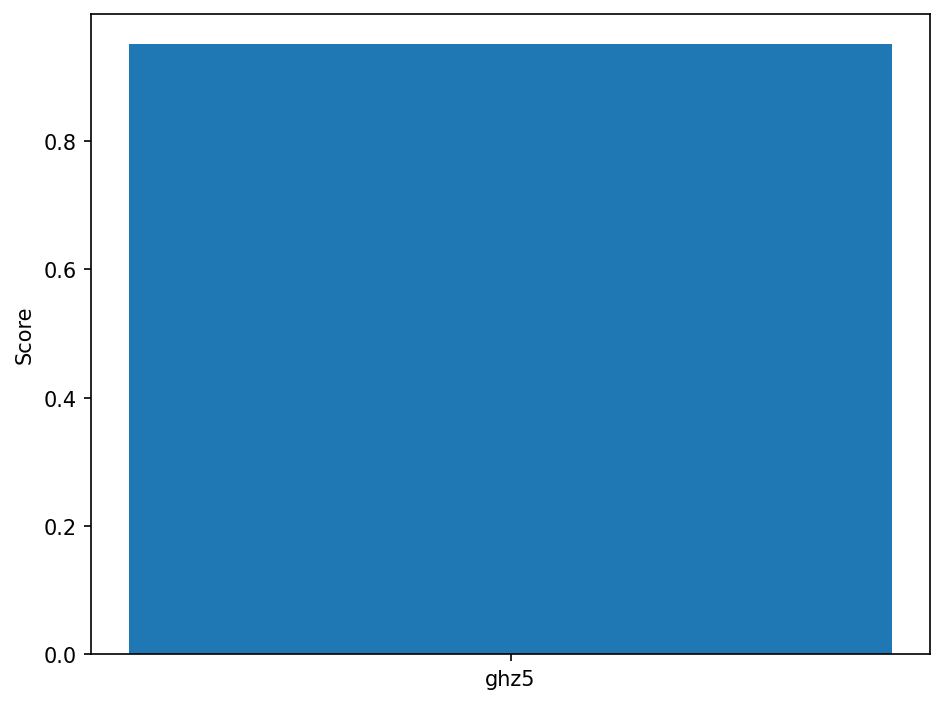

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz7 ; SCORE = 0.9194724764376145


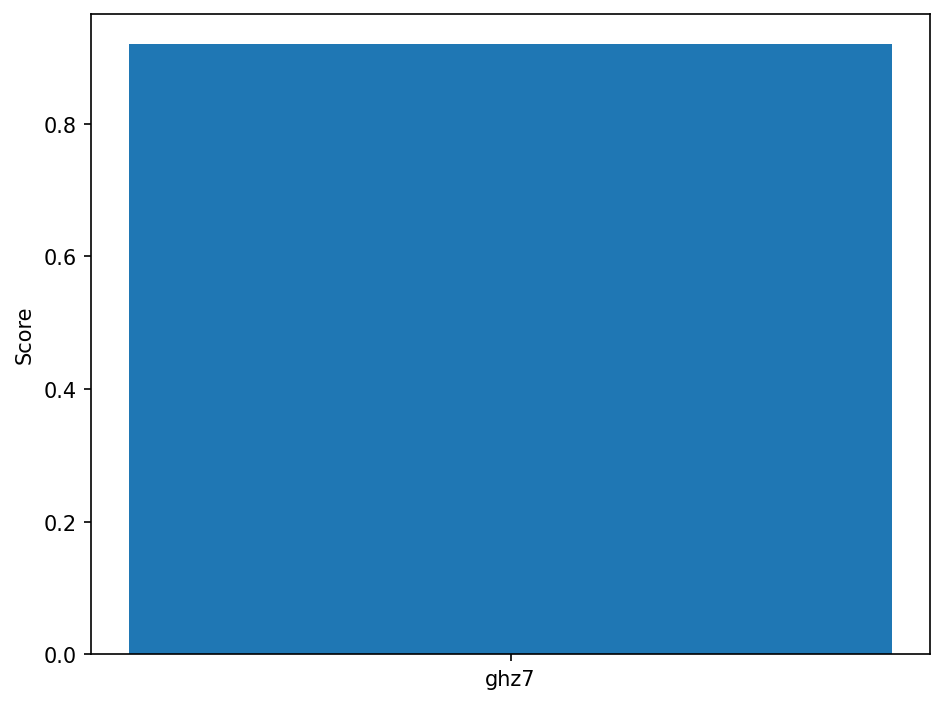

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz9 ; SCORE = 0.9136451377713419


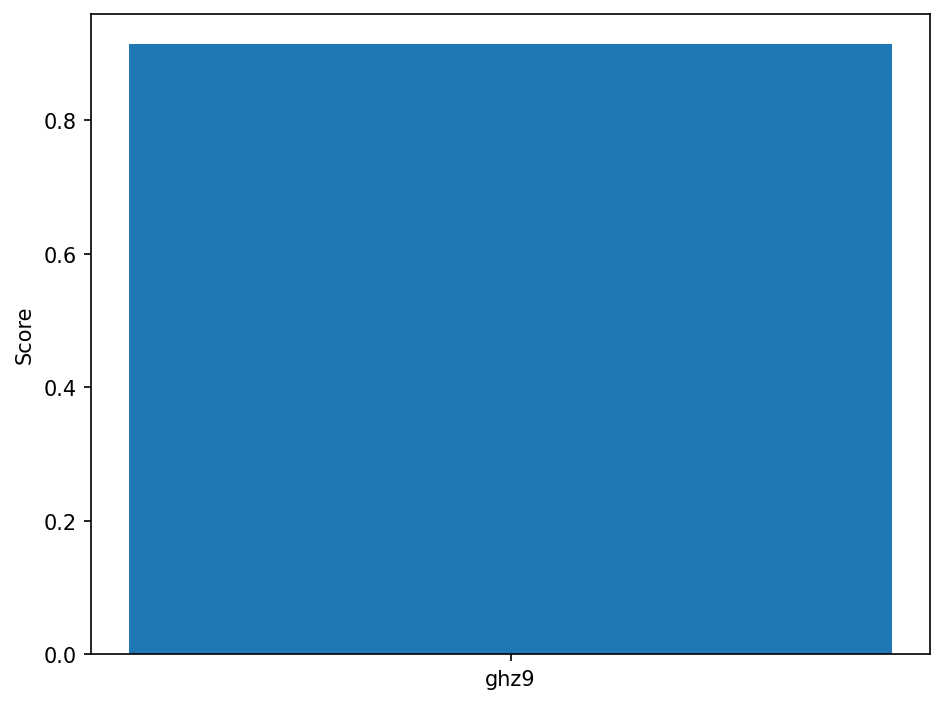

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz11 ; SCORE = 0.9152103116104024


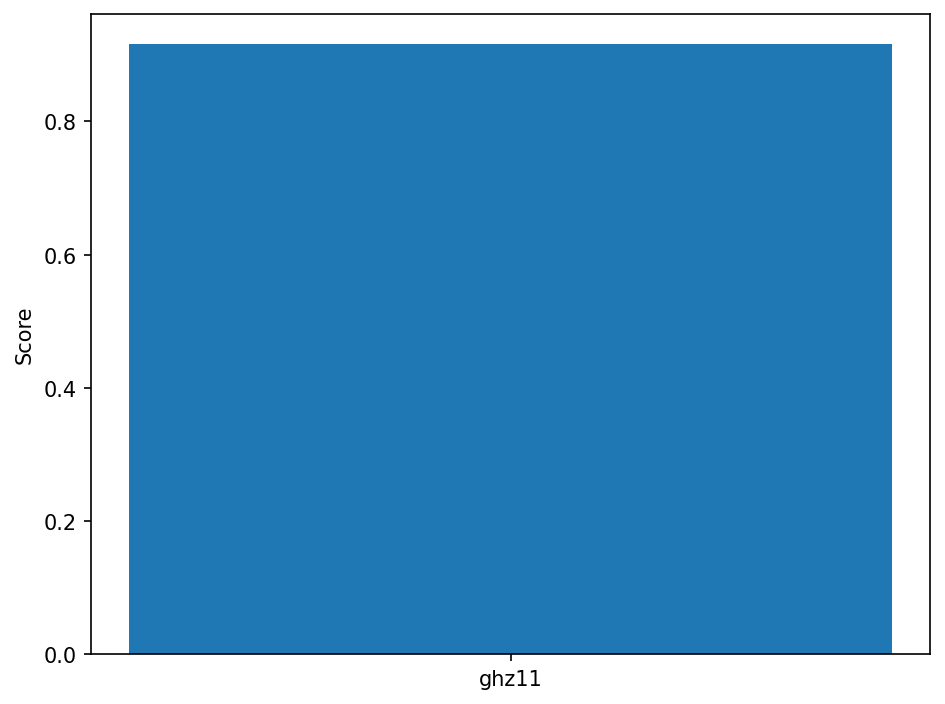

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz13 ; SCORE = 0.9184452497061741


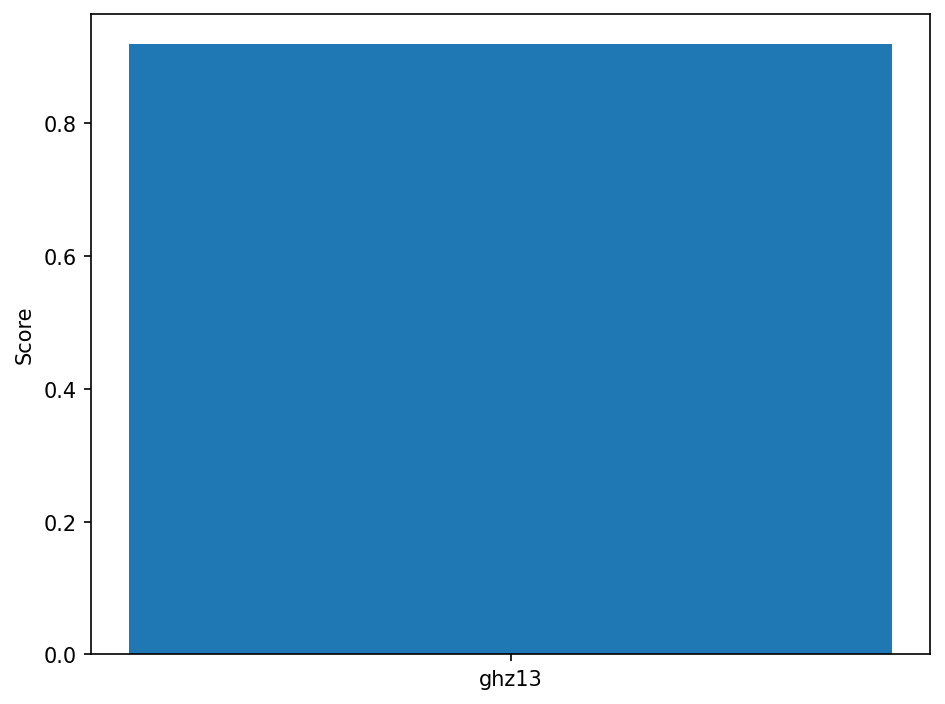

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz15 ; SCORE = 0.914407873063268


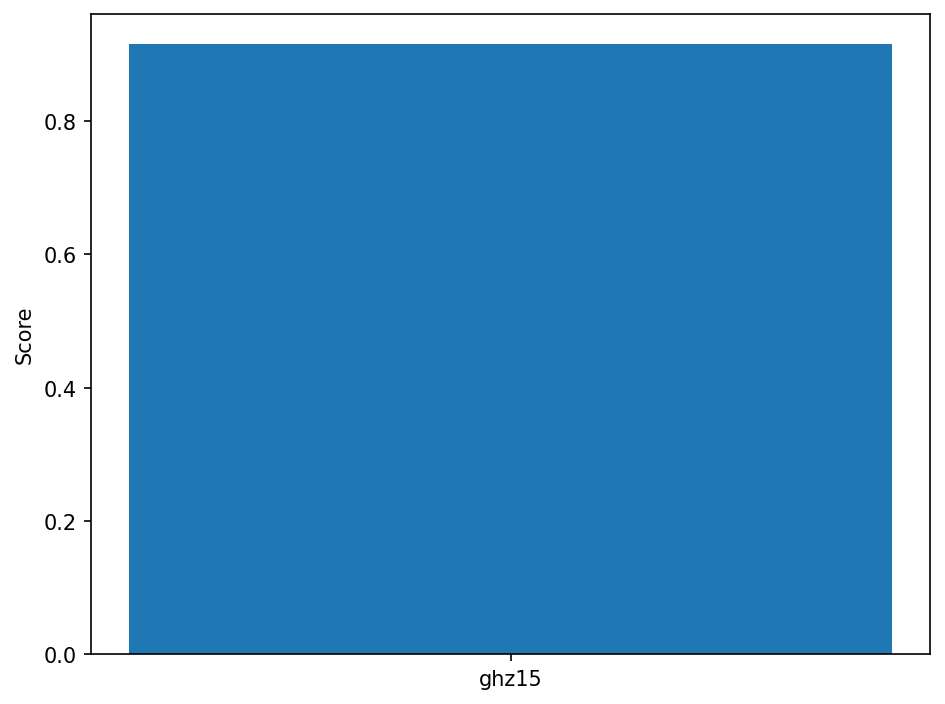

-----------------------------------------------------------


In [7]:
for label,benchmark,backend,job,score,sd in jobs:
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

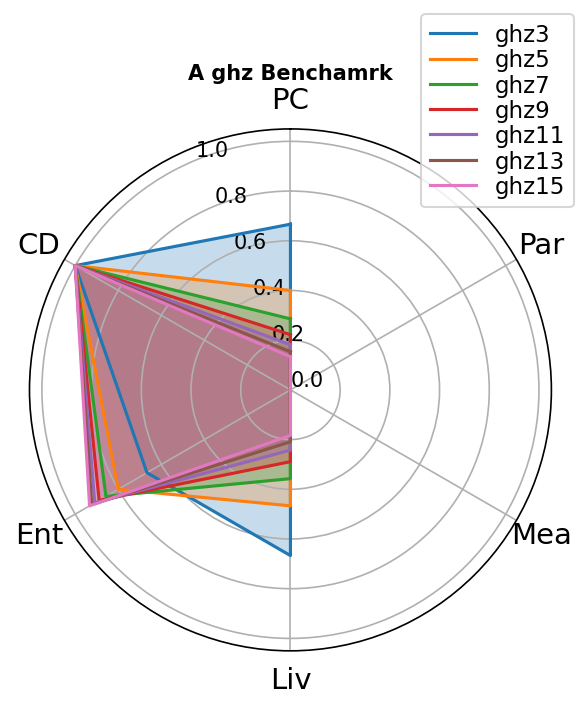

In [8]:
names=[]
scores=[]
X="A "+name_of_algo+' Benchamrk'
for i,j in benchmark_features.items():
    names.append(i)
    scores.append(j)
supermarq.plotting.plot_benchmark([X,names,scores],
        spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],show=True)

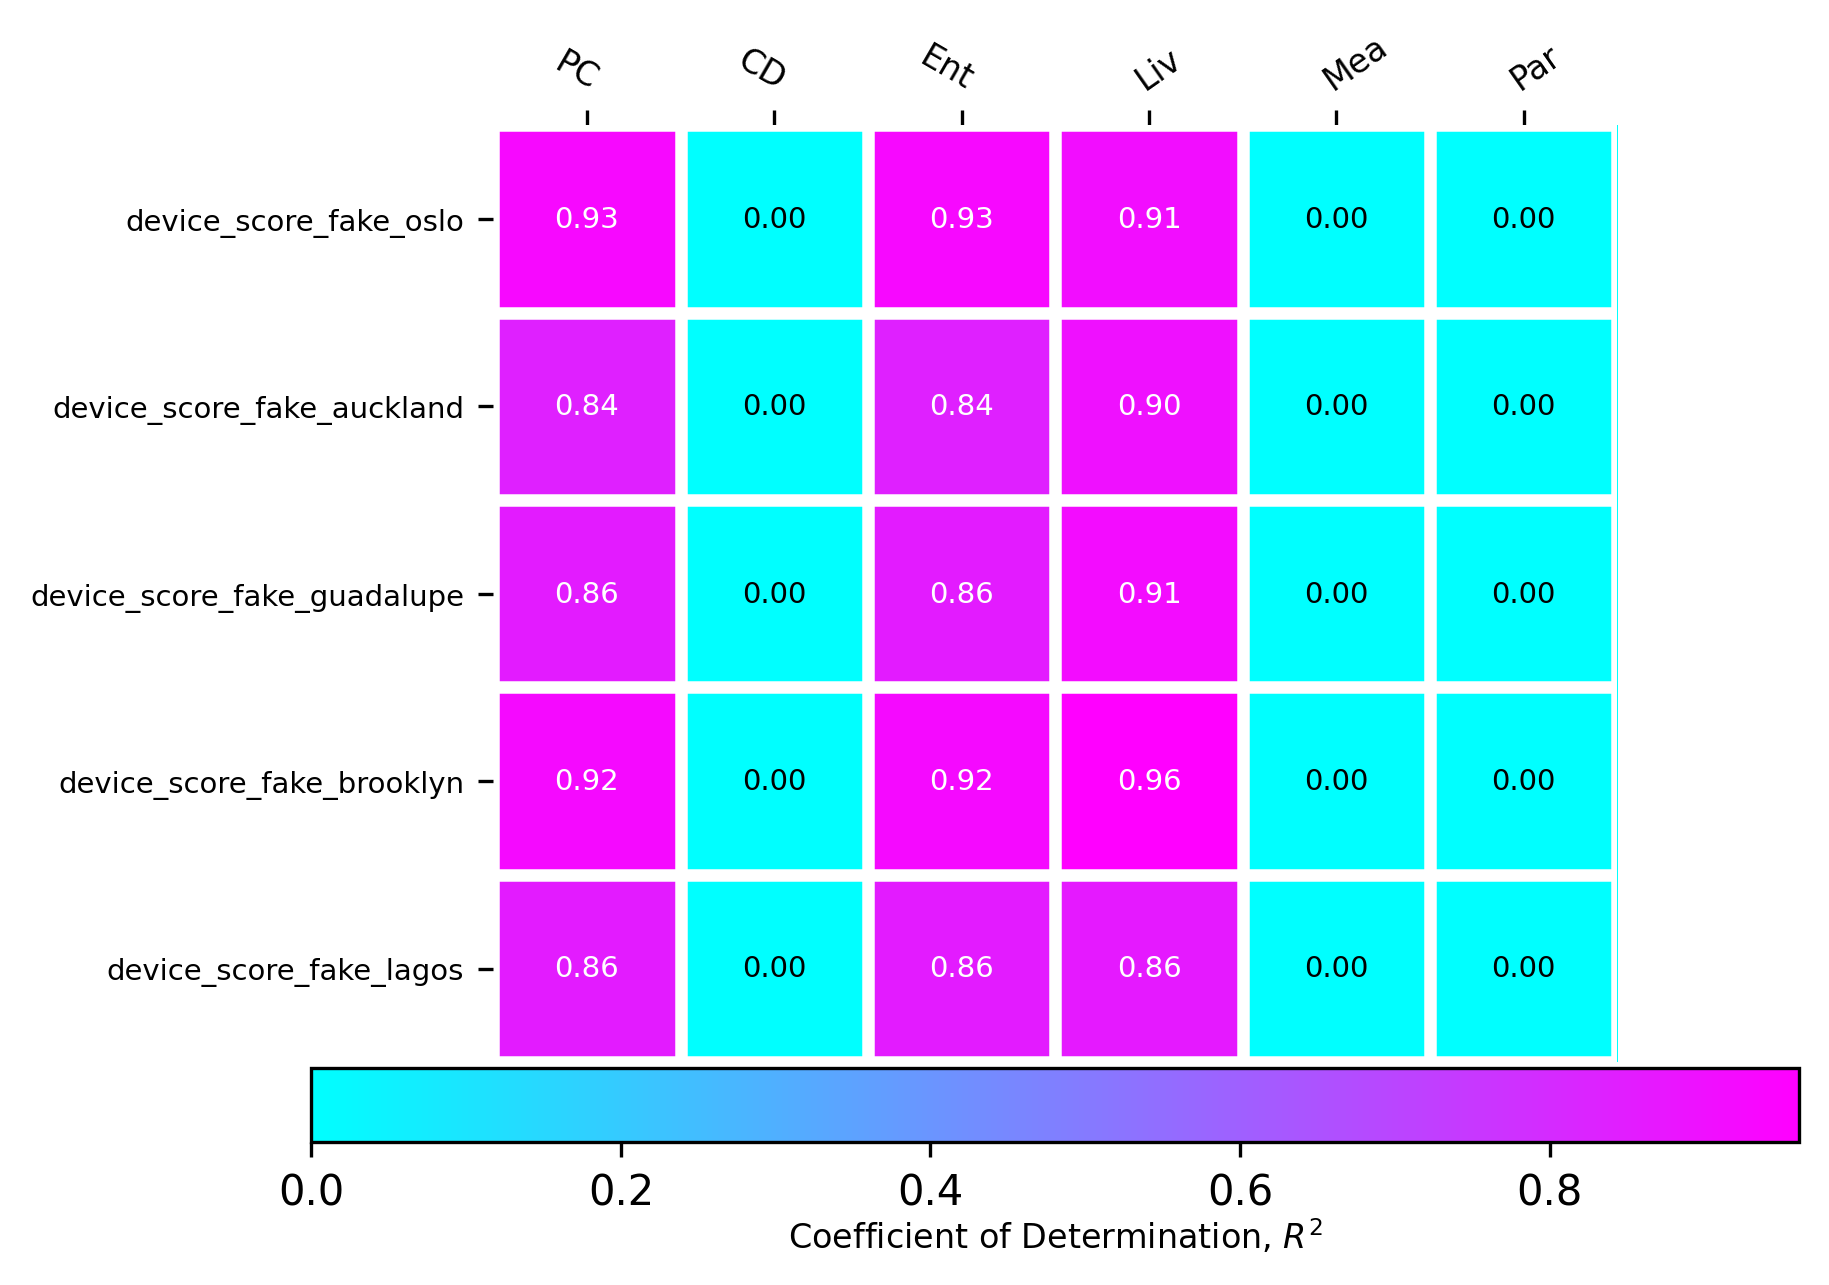

In [9]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

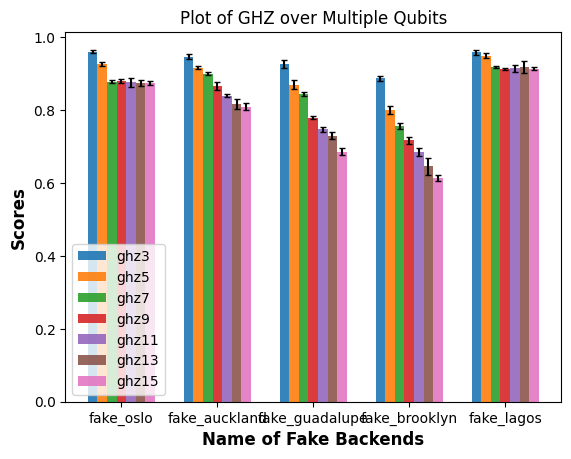

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
all_fake_names=[]
all_score=[]
all_sd=[]
all_ckt=[]
for i in selected_fakes:
    all_fake_names.append(i().name)    
for benchmark, label in benchmarks:
    i=[]
    j=[]
    k=[]
    for ckt,benchmark,backend,job,score,sd in jobs:
        if ckt == label:
            i.append(score)
            j.append(sd)
    all_ckt.append(label)
    all_score.append(i)
    all_sd.append(j)
num_bars = len(all_score)
width = 0.1
x = np.arange(len(all_fake_names)) # x-axis positions for each bar
fig, ax = plt.subplots()
for i in range(num_bars):               # Create bars for each category with appropriate offsets
    ax.bar(x + i * width, all_score[i], width=width, label=f'Bar {i+1}', 
           yerr=all_sd[i],align='center',alpha=0.9,ecolor='black',capsize=2)
ax.set_xlabel('Name of Fake Backends',fontweight ='bold',fontsize = 12)
ax.set_ylabel('Scores',fontweight ='bold',fontsize = 12)
ax.set_title('Plot of GHZ over Multiple Qubits')
ax.set_xticks(x + (num_bars - 1) * width / 2)
ax.set_xticklabels(all_fake_names)
ax.legend(all_ckt,loc="lower left")
#ax.grid(True)
plt.show()